STA 663 Final Project
<br>
Author: Yiling Liu, Lanqiu Yao

master project 恶心死人了，之后再多写一个字都好煎熬 TUT

<p style="text-align: center;">
<span style="color: ; font-family: Babas; font-size: 2em;">Hierarchical Topic models and </span>
</p> 

<p style="text-align: center;">
<span style="color: ; font-family: Babas; font-size: 2em;">the Nested Chinese Restaurant Process</span>
</p> 



## 1. Introduction

## 2. Chinese Restaurant Process

The Chinese Restaurant Process (CRP) is a distribuition on partitions of integers. Imagine there are M customers in a Chinese restaurant with infinte tables. The first customer sit in the first table. The following customers have two kinds of choices:

+ Sit in the table that some one alse is already there 
+ Sit in a new table

These two choices have probabilities that depend on the previosu customers at the tables. 
<br>
Specifically, for the $m$th customer, the probability to sit in a table is:
+ p(occupied table i| previous customers) = $\frac{m_i}{\gamma+m-1}$
+ p(next unoccupied table| previous customers) = $\frac{\gamma}{\gamma+m-1}$,

where $m_i$ represnets the number of previous customers at the table $i$; $\gamma$ is a parameter.

If we have M customers, the CRP will give us a partion of M customers, which has the same structure as a Dirichlet process. 

![3](3.png)

### 2.1 Nested Chinese Restaurant Process

The CRP establishes a one-to-one relationship between tables and mixture components. A hierarchical version of CRP was also developed to model one-to-many

The nCRP is very similar with CRP except for its hieracrchical structure. 

We can see an example in the following plot.
![1](1.png)

###  2.2 A very simple version of CRP in Python

The function for chinese restaurant process (CRP):

**Input**
+ N is the number of customs
+ alpha is the $\alpha$ parameter

**Output**
+ The number of custom in each table 
+ The probability of sitting in each table

In [66]:
def CRP(alpha,N):
    """
    Description
    ---------
    Funcion: Chinese Restaurant Process
    
    Parameter
    ---------
    alpha: concentration parameter 
    N: the number of customers
    
    Return
    ------
    tables: number of customers at each table
    p: the probability for customers to sit in each table
    """
    import numpy as np
    # initial
    # N: total number of people 
    # alpha: the alpha parameter
    tables = np.zeros(N)  # table's number of customer 
    tables[0] = 1         # at first, every table is empty
    if N==1:
        tables=np.array(1)
        p=[1]
    if N>1:
        for i in range(2,N+1):
            p_old=tables/(alpha+i-1) # the probability of sitting in a table with other people   
            p_old=p_old[p_old>0] 
            p_new=alpha/(alpha+i-1)      # the probability of sitting in a new table
            n_temp=len(p_old)+1
            p=list(p_old)+[p_new]
            num=np.random.choice(n_temp,p=p) # generate the table number based on the probabilities
            tables[num]=tables[num]+1
        tables=tables[tables>0]
    return(tables,p)

In [78]:
def CRP_next(alpha,topic):
    """
    Description
    ---------
    Funcion: Chinese Restaurant Process
    
    Parameter
    ---------
    alpha: concentration parameter 
    topic: the exist tables 
    
    Return
    ------
    p: the probability for a new customers to sit in each of the tables
    """
    import numpy as np
    N=len(topic) # number of tables
    word_list=[] # total customers
    for t in topic:
        word_list=word_list+t
    m=len(word_list) # customers' number
    
    tables = np.array([len(x) for x in topic])  # tables with their customers
    p_old=tables/(alpha+m) # the probability of sitting in a table with other people   
    p_new=alpha/(alpha+m)      # the probability of sitting in a new table
    p=list(p_old)+[p_new]  # the last probability is the probability to sit in a new table 
    return(p)

**Example **

In [27]:
CRP(1,100)

(array([45., 43.,  1.,  2.,  9.]), [0.44, 0.43, 0.01, 0.02, 0.09, 0.01])

In [330]:
topic=[['a', 'ggtfdg', 'dsgfgfd', 'ds', 'ds', 'yhhr'], ['123', '66']]
CRP_next(1,topic)

[0.6666666666666666, 0.2222222222222222, 0.1111111111111111]

## 3. A hierarchical topic model

<span style="color:red"> need more descriptions.</span>

### 3.1 A topic model 


Generation of a document:
1. Choose a $K$-vector $\theta$ of topic proportions from a distribution $p(\theta|\alpha)$ 
2. Repeated sample words from the mixture distriubtion $p(\omega|\theta)$ for the chosen value of $\theta$

Besides, when the $p(\theta|\alpha)$ is chosen to be a Dirichlet distribution, these processes are identified as a latent Dirichlet allocation model (LDA)

### 3.2 A hierarchical topic model 

Back to the hierarchical topic model, which is very simliar with previous one but added a hierarchical structure. For a hierarchial topic model with L-levels, we can imagine it as a L-level tree and each node presents a topic.

Generation of a document:
1. Choose a path from the root to a leaf
2. Choose the topic proportions $\theta$ from a L-dimension Dirichlet
3. Generated the words in the document for m a mixture of the topics along the path from the root to leaf, wiht mixing proportions $\theta$

This generation of document is very simliar with previous one except the mixing proportion $\theta$ is from a hierarchical structure

![2](2.png)

The graph represnets the hierarchical LDA (hLDA) model. The hLDA has a prior from nCRP. 

just to show our understanding of the project 

+ $\omega$
+ $z$: a multinomial variable
+ $\beta$: a parameter
+ $\theta$: a $K-$dimensional vector

document specific mixture distribution: $p(\omega|\theta)=\sum_{i=1}^{K} \theta_i p(\omega| z=i, \beta+i)$

$p(\theta|\alpha)$ Dirichlet distribution

+ $\alpha$: a corpus-level parameter 


## 4. Approximate inference by Gibbs sampling

### 4.1 Introduction to Gibbs sampling

<span style="color:red"> add some introduction about gibbs sampling?.</span>


### 4.2 Gibbs sampling for the hLDA model

**The variables that are needed to be sampled are:**

1. $w_{m,n}$: the $n$th word in the $m$th document (Important note: these are the only observed variables in the model)
2. $c_{m,l}$: the restaurant (node), the $l$th topic in the $m$th document
3. $z_{m,n}$: the assignment of the $n$th word in the $m$th document to one of the $L$ topics
4. There are also some variables needed in the model, but they are not needed to be sampled

After illustrate the variables in the model, we also need to know the order and the methods of the sampling. We can apply the sampling methods into two steps: 
1. sample the $z_{m,n}$ variale by using LDA+CRP
2. sample the $c_{m,l}$ based on the first step (given the LDA hidden variables). 


* To be more specific:

### 4.2.1 Sample $z_{m,n}$

The $z_{m,n}$ is sampled under LDA model based on the method in paper:

<p style="text-align: center;">
*A probabilistic approach to semantic representation*
</p>

The distribution of any word 

In [31]:
def Z(corpus, T, alpha, beta):
    """
    Description
    ---------
    Funcion:  sample zmn under LDA model
    
    Parameter
    ---------
    corpus: the total corpus, a list of documents, that is, a list of lists
    T: the number of topics
    alpha, beta: parameters
    
    Return
    ------
    topic: the word list in each topic
    topic_num: the length of each topic
    """
    
    W=np.sum([len(word) for word in corpus]) # the number of the total words
    N=len(corpus)                            # the number of documents 
    topic=[[] for t in range(T)]
    topic_num=np.zeros(T)    

    for i,di in enumerate(corpus):
        for wi in di:
            p=np.zeros(T)
            for j in range(T):
                nij_wi=topic[j].count(wi)   # number of wi tht assigned to topic j
                nij=len(topic[j])           # total number of words assigned to topic j 
                nij_di=np.sum(np.isin(topic[j],di)) # number of words from di in topic j
                ni_di=len(di)               # total number of words in di
                part1=(nij_wi+beta)/(nij+W*beta)
                part2=(nij_di+alpha)/(ni_di+T*alpha)
                p[j]=part1 * part2
            pp=p/np.sum(p)
            w_assign=np.random.multinomial(1, pp, size=1)
            i_topic=int(np.where(w_assign[0]==1)[0])
            topic[i_topic].append(wi)
            topic_num=topic_num+w_assign
    return(topic,topic_num)

**Example**

In [333]:
corpus=[['a'], ['123', 'ggtfdg'], ['dsgfgfd', 'ds'], ['ds', '66', 'yhhr']]
T=2
alpha=1
beta=1

In [334]:
Z(corpus, T, alpha, beta)

([['123', 'ggtfdg', 'ds', 'ds', '66', 'yhhr'], ['a', 'dsgfgfd']],
 array([[6., 2.]]))

### 4.2.2 sample $c_m$ from the nCRP
$$p(c_m | w, c_{-m}, z) \propto p(w_m | c, w_{-m}, z)  p(c_m | c_{-m})$$

The calculation of the $p(w_m | c, w_{-m},z)$ value based on the likelihood function: 

$$p(w_m | c, w_{-m},z) = \prod_{l=1}^{L} (\frac{\Gamma (n_{c_{m,l,-m}}^{(\cdot)}+W\eta)}{\prod_{\omega} \Gamma (n_{c_{m,l,-m}}^{(\omega)}+\eta)}\frac{\prod_{\omega} \Gamma(n_{c_{m,l,-m}}^{(\omega)}+n_{c_{m,l,m}}^{(\cdot)}+\eta)}{\Gamma(n_{c_{m,l,-m}}^{(\cdot)}+ n_{c_{m,l,m}}^{(\cdot)}  W\eta)})$$

where, 

In [335]:
def word_likelihood(corpus,topic,eta):
    """
    Description
    ---------
    Funcion:  calculation of p(w|c,w,z), based on the likelihood function
    
    Parameter
    ---------
    corpus: the total corpus, a list of documents, that is, a list of lists
    topic: the topics of the corpus
    eta: parameter 
    
    Return
    ------
    a matrix of probabilities: 
        the number of rows = the number of documents, 
        the number of columns = the number of topics,
        the cell: the probability of each document to be assigned in each topic
    """
    
    import math
    res=np.zeros((len(corpus),len(topic)))  # generate the results matrix
    
    word_list=[]                            # generate the word list that contains all the words
    for i in range(len(corpus)):
        word_list=word_list+corpus[i]
    W=len(word_list)                        # the length of word list
    
    for i,di in enumerate(corpus):
        p_w=1
        for j in range(len(topic)):         #calculate the tow parts of the equation
            nc_dot=len(topic[j])    
            part1_denominator=1
            part2_nominator=1
        
            part1_nominator = math.gamma(nc_dot-np.sum(np.isin(topic[j],di))+W*eta)
            part2_denominator = math.gamma(nc_dot+W*eta)
        
            for word in word_list:
                ncm_w=topic[j].count(word)-di.count(word)
                if ncm_w <0:
                    ncm_w=0
                nc_w=topic[j].count(word)
                part1_denominator=part1_denominator*(ncm_w+eta)
                part2_nominator=part2_nominator*(nc_w+eta)
        
            p_w=p_w*part1_nominator*part2_nominator/(part1_denominator*part2_denominator) 
            res[i,j]=p_w
    res=res/np.sum(res,axis=1).reshape(-1,1)
    return(res)

**Example**

In [344]:
corpus=[['a'], ['123', 'ggtfdg'], ['dsgfgfd', 'ds'], ['ds', '66', 'yhhr']]
T=2
alpha=1
beta=1
eta=1
topic=Z(corpus, T, alpha, beta)[0]
word_likelihood(corpus,topic,eta)

array([[0.85714286, 0.14285714],
       [0.5       , 0.5       ],
       [0.99660249, 0.00339751],
       [0.99660249, 0.00339751]])

### 4.2.3 sample the  $p(c_m|c_{-m})$

In [114]:
def CRP_prior(corpus,topic,alpha):
    res=np.zeros((len(corpus),len(topic)))
    for i,corpus_i in enumerate(corpus):
        topic_new=[]
        for t in topic:
            topic_new.append([k for k in t if k not in corpus_i])
        p=CRP_next(alpha,topic_new)
        res[i,:]=p[1:]
    return(res)

**Example**

In [345]:
corpus=[['a'], ['123', 'ggtfdg'], ['dsgfgfd', 'ds'], ['ds', '66', 'yhhr']]
T=2
alpha=1
beta=1
eta=1
topic=Z(corpus, T, alpha, beta)[0]

CRP_prior(corpus,topic,alpha)

array([[0.5       , 0.125     ],
       [0.71428571, 0.14285714],
       [0.33333333, 0.16666667],
       [0.4       , 0.2       ]])

### 4 function to combine the previous functions 

In [193]:
def gibbs_position(corpus,T,alpha,beta,eta,iters=100):
    word_list=[]
    for i in corpus:
        word_list=word_list+i
    W=len(word_list)
    gibbs=np.zeros((W,iters))
    for j in range(iters):
        topic=Z(corpus, T, alpha, beta)[0]
        w_m=word_likelihood(corpus,topic,eta)
        c_=CRP_prior(corpus,topic,alpha)
        c_m = (w_m * c_) / (w_m * c_).sum(axis = 1)[:, np.newaxis]
        g=[]
        for i,corpus_i in enumerate(corpus):
            for word in corpus_i:
                g.append(int(np.where(np.random.multinomial(1, c_m[i])!=0)[0]))
        gibbs[:,j]=g
    
    word_topic=[]
    for i in range(W):
        counts=[]
        for t in range(T):
            counts.append(list(gibbs[i]).count(t))
        word_topic.append(np.where(counts==np.max(counts))[0][0])
    return(word_topic)

In [311]:
def gibbs_list(corpus,T,alpha,beta,eta,iters):
    word_list=[]
    for i in corpus:
        word_list=word_list+i
    position=gibbs1(corpus,T,alpha,beta,eta,iters)
    n_topic=len(np.unique(position))
    word_list_topic=[[] for x in range(n_topic)]
    for n_t in range(n_topic):
        word_list_topic[n_t].append(list(np.array(word_list)[np.array(position)==np.array(n_t)]))
    return(position,word_list_topic)    

**Example **

In [348]:
corpus=[['a'], ['123', 'ggtfdg'], ['dsgfgfd', 'ds'], ['ds', '66', 'yhhr']]
T=2
alpha=1
beta=1
eta=0.1
iters=100

gibbs_list(corpus,T,alpha,beta,eta,iters)[1]

[[['a', 'dsgfgfd', 'ds']], [['123', 'ggtfdg', 'ds', '66', 'yhhr']]]

### Wrap up to our *hLDA* function

In [358]:
def node_sampling(corpus, alpha):
    topic = []    
    for corpus_i in corpus:
        for word in corpus_i:
            c_m = CRP_next(alpha,topic)
            theta = np.random.multinomial(1, (np.array(c_m)/sum(c_m))).argmax()

            if theta == len(c_m)-1:
                topic.append([word])
            else:
                topic[theta].append(word)
    return topic

**Example**

In [361]:
phi=2
topic = node_sampling(corpus, phi)
topic

[['a', 'dsgfgfd', 'ds'], ['123', 'ds', '66'], ['ggtfdg', 'yhhr']]

In [390]:
def hLDA(corpus, alpha, beta, eta, iters, level):
    topic = node_sampling(corpus, phi)

    hLDA_tree = [[] for _ in range(level)]
    tmp_tree = []
    node = [[] for _ in range(level+1)]
    node[0].append(1)
    
    for i in range(level):
        if i == 0:
            wn_topic = gibbs_list(corpus, len(topic), alpha, beta, eta, iters)[1]
            node_topic = [x for word in wn_topic for x in word]
            hLDA_tree[0].append(node_topic)
            tmp_tree.append(wn_topic[1:])
            tmp_tree = tmp_tree[0]
            node[1].append(len(wn_topic[1:]))
        else:
            for j in range(sum(node[i])):
                if tmp_tree == []:
                    break
                wn_topic = gibbs_list(corpus, len(topic), alpha, beta, eta, iters)[1]
                node_topic = [x for word in wn_topic for x in word]
                hLDA_tree[i].append(node_topic)
                tmp_tree.remove(tmp_tree[0])
                if wn_topic[1:] != []:
                    tmp_tree.extend(wn_topic[1:])
                node[i+1].append(len(wn_topic[1:]))
        
    return hLDA_tree, node[:level]

In [385]:
wn_topic=gibbs_list(corpus, len(topic), alpha, beta, eta, iters)[1]

In [376]:
alpha=0.1
beta=0.1
eta=0.1

In [391]:
hLDA(corpus, alpha, beta, eta, 100, 2)

([[[['ds'], ['dsgfgfd'], ['a', '123', 'ggtfdg', 'ds', '66', 'yhhr']]],
  [[[]], [['dsgfgfd', 'ds'], []]]],
 [[1], [2]])

<span style="color:red"> output 太丑了，得改.</span>


In [395]:
trees=hLDA(corpus, alpha, beta, eta, 100, 2)

In [396]:
trees

([[[['dsgfgfd'], ['a'], ['123', 'ggtfdg', 'ds', 'ds', '66', 'yhhr']]],
  [[[], ['ds']], [[], ['ggtfdg']]]],
 [[1], [2]])

In [323]:
import numpy as np
from scipy.special import gammaln
import random
from collections import Counter
import string
import graphviz
import pygraphviz


In [324]:
! pip install pydot

    100% |████████████████████████████████| 133kB 4.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydot ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot
You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [325]:
import pydot

In [327]:
most_common = lambda x: Counter(x).most_common(1)[0][0]

In [393]:
hLDA(corpus, alpha, beta, eta, 100, 2)

([[[[], []]], [[[], ['dsgfgfd', 'ds']]]], [[1], [1]])

In [397]:
HLDA_plot(trees, Len = 8, save = False)

TypeError: unhashable type: 'list'

2


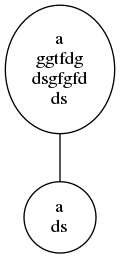

In [328]:
HLDA_plot(hLDA(corpus, alpha, beta, eta, 100, 2), Len = 8, save = False)

In [326]:
def HLDA_plot(hLDA_object, Len = 8, save = False):
    
    from IPython.display import Image, display
    def viewPydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)

    words = hLDA_object[0]
    struc = hLDA_object[1]
      
    graph = pydot.Dot(graph_type='graph')
    end_index = [np.insert(np.cumsum(i),0,0) for i in struc]
    
    for level in range(len(struc)-1):
        leaf_level = level + 1
        leaf_word = words[leaf_level]
        leaf_struc = struc[leaf_level]
        word = words[level]
        end_leaf_index = end_index[leaf_level]

        for len_root in range(len(word)):
            root_word = '\n'.join([x[0] for x in Counter(word[len_root]).most_common(Len)])
            leaf_index = leaf_struc[len_root]  
            start = end_leaf_index[len_root]
            end = end_leaf_index[len_root+1]
            lf = leaf_word[start:end]  
            for l in lf:
                leaf_w = '\n'.join([x[0] for x in Counter(list(l)).most_common(Len)])
                edge = pydot.Edge(root_word, leaf_w)
                graph.add_edge(edge)
    if save == True:
        graph.write_png('graph.png')
    viewPydot(graph)

## 5. Example

## 6.Optimization

To make things faster

I think the easiest way to do optimization is :
1. Use of vectorization
2. JIT or AOT compilation of critical functions

## 7. Install our package  

The CRP is amenable to mixture modeling because we can establish a one-to-one rela- tionship between tables and mixture components and a one-to-many relationship between mixture components and data. In the models that we will consider, however, each data point is associated with multiple mixture components which lie along a path in a hierarchy. We develop a hierarchical version of the CRP to use in specifying a prior for such models.
A nested Chinese restaurant process can be defined by imagining the following scenario. Suppose that there are an infinite number of infinite-table Chinese restaurants in a city. One restaurant is determined to be the root restaurant and on each of its infinite tables is a card with the name of another restaurant. On each of the tables in those restaurants are cards that refer to other restaurants, and this structure repeats infinitely. Each restaurant is referred to exactly once; thus, the restaurants in the city are organized into an infinitely-branched tree. Note that each restaurant is associated with a level in this tree (e.g., the root restaurant is at level 1 and the restaurants it refers to are at level 2).
A tourist arrives in the city for a culinary vacation. On the first evening, he enters the root Chinese restaurant and selects a table using Eq. (1). On the second evening, he goes to the restaurant identified on the first night’s table and chooses another table, again from Eq. (1). He repeats this process for L days. At the end of the trip, the tourist has sat at L restaurants which constitute a path from the root to a restaurant at the Lth level in the infinite tree described above. After M tourists take L-day vacations, the collection of paths describe a particular L-level subtree of the infinite tree (see Figure 1a for an example of such a tree).
This prior can be used to model topic hierarchies. Just as a standard CRP can be used to express uncertainty about a possible number of components, the nested CRP can be used to express uncertainty about possible L-level trees.